# Análisis Exploratorio de Datos

Proyecto de efectividad de campañas
de prevención de enfermedades cardiovasculares.

Luis Alejandro Azúa Urrutia

19/02/2026

## Objetivo

Realizar un análisis exploratorio utilizando la base de datos del Censo Nacional de Población y Vivienda 2020 del INEGI con el propósito de predecir la presencia de enfermedades cardiovasculares a través del efecto de diversas variables en la incidencia de enfermedades cardiovasculares.

In [2]:
#Importacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Carga de datos

Dataset "heart_2020_cleaned.csv"

In [3]:
#Importación de datos
def load_data(file_path):
    """
    Importa el dataset y muestra informacion.
    """
    df_heart = pd.read_csv(file_path)
    print(
        f"Dataset 'heart_2020_cleaned.csv' cargado. "
        f"{df_heart.shape[0]} filas, {df_heart.shape[1]} columnas."
        )
    return df_heart

df_heart = load_data('heart_2020_cleaned.csv')
df_heart.head(11)

Dataset 'heart_2020_cleaned.csv' cargado. 319795 filas, 18 columnas.


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [4]:
raw_columns = list(df_heart)
raw_columns

['HeartDisease',
 'BMI',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'PhysicalHealth',
 'MentalHealth',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'SleepTime',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [5]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [13]:
muestra_data = df_heart.head(5).T

muestra_data.columns = [f'Sujeto {i+1}' for i in range(5)]

muestra_data

,Sujeto 1,Sujeto 2,Sujeto 3,Sujeto 4,Sujeto 5
HeartDisease,No,No,No,No,No
BMI,16.6,20.34,26.58,24.21,23.71
Smoking,Yes,No,Yes,No,No
AlcoholDrinking,No,No,No,No,No
Stroke,No,Yes,No,No,No
PhysicalHealth,3.0,0.0,20.0,0.0,28.0
MentalHealth,30.0,0.0,30.0,0.0,0.0
DiffWalking,No,No,No,No,Yes
Sex,Female,Female,Male,Female,Female
AgeCategory,55-59,80 or older,65-69,75-79,40-44


## Analisis exploratorio de datos:

Se busca encontrar correlaciones importantes entre la variable objetivo y las otras variables, tanto categóricas como numéricas.


Analisis Univariado:
- Variable objetivo: Enfermedades cardiacas.
- Distribución de fumadores y no fumadores.
- Distribución de indice de masa corporal (BMI).
- Distribucion por edad.

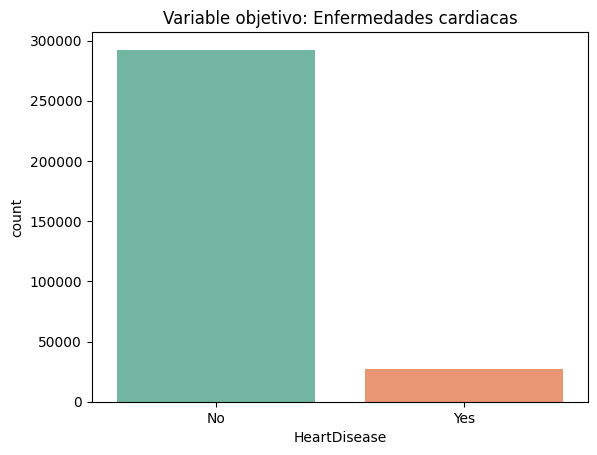

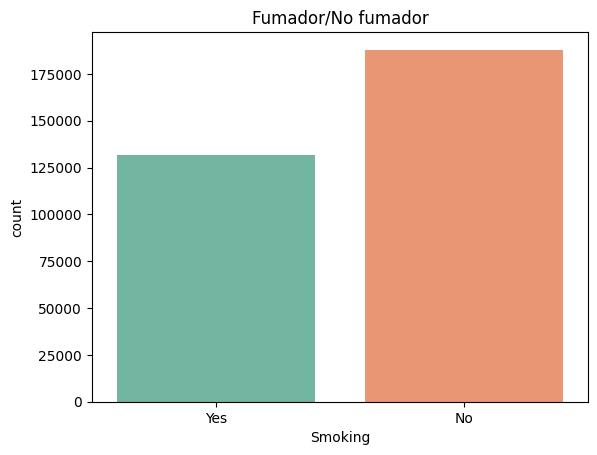

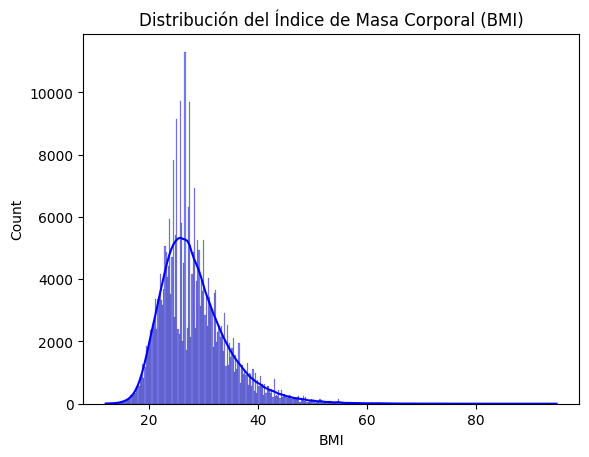

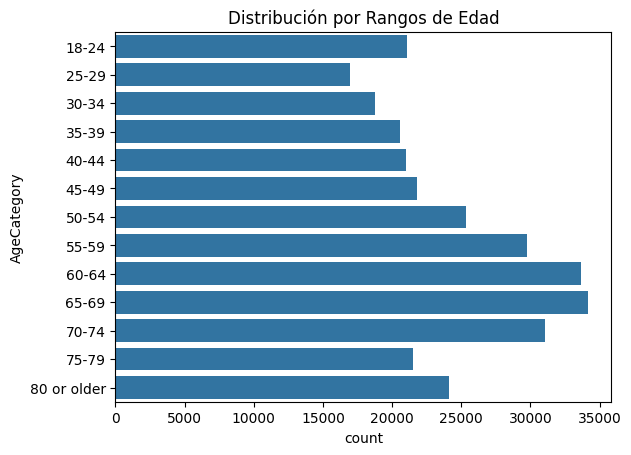

In [6]:
def univariado_plot(df_heart):
    """
    Genera gráfico de una variable clave.
    """
    #Enfermedades cardíacas (HeartDisease)
    plt.figure()
    sns.countplot(data=df_heart, x ='HeartDisease', palette='Set2')
    plt.title('Variable objetivo: Enfermedades cardiacas')

    #Fuma o no (smoking)
    plt.figure()
    sns.countplot(data=df_heart, x ='Smoking', palette='Set2')
    plt.title('Fumador/No fumador')

    #Distribución de Indice de masa corporal(IMC)
    plt.figure()
    sns.histplot(df_heart['BMI'], kde=True, color='blue')
    plt.title('Distribución del Índice de Masa Corporal (BMI)')
    
    #Distribución por Edad (AgeCategory)
    plt.figure()
    sns.countplot(data=df_heart, y='AgeCategory', 
                  order=sorted(df_heart['AgeCategory'].unique()))
    plt.title('Distribución por Rangos de Edad')

    plt.show()

univariado_plot(df_heart)

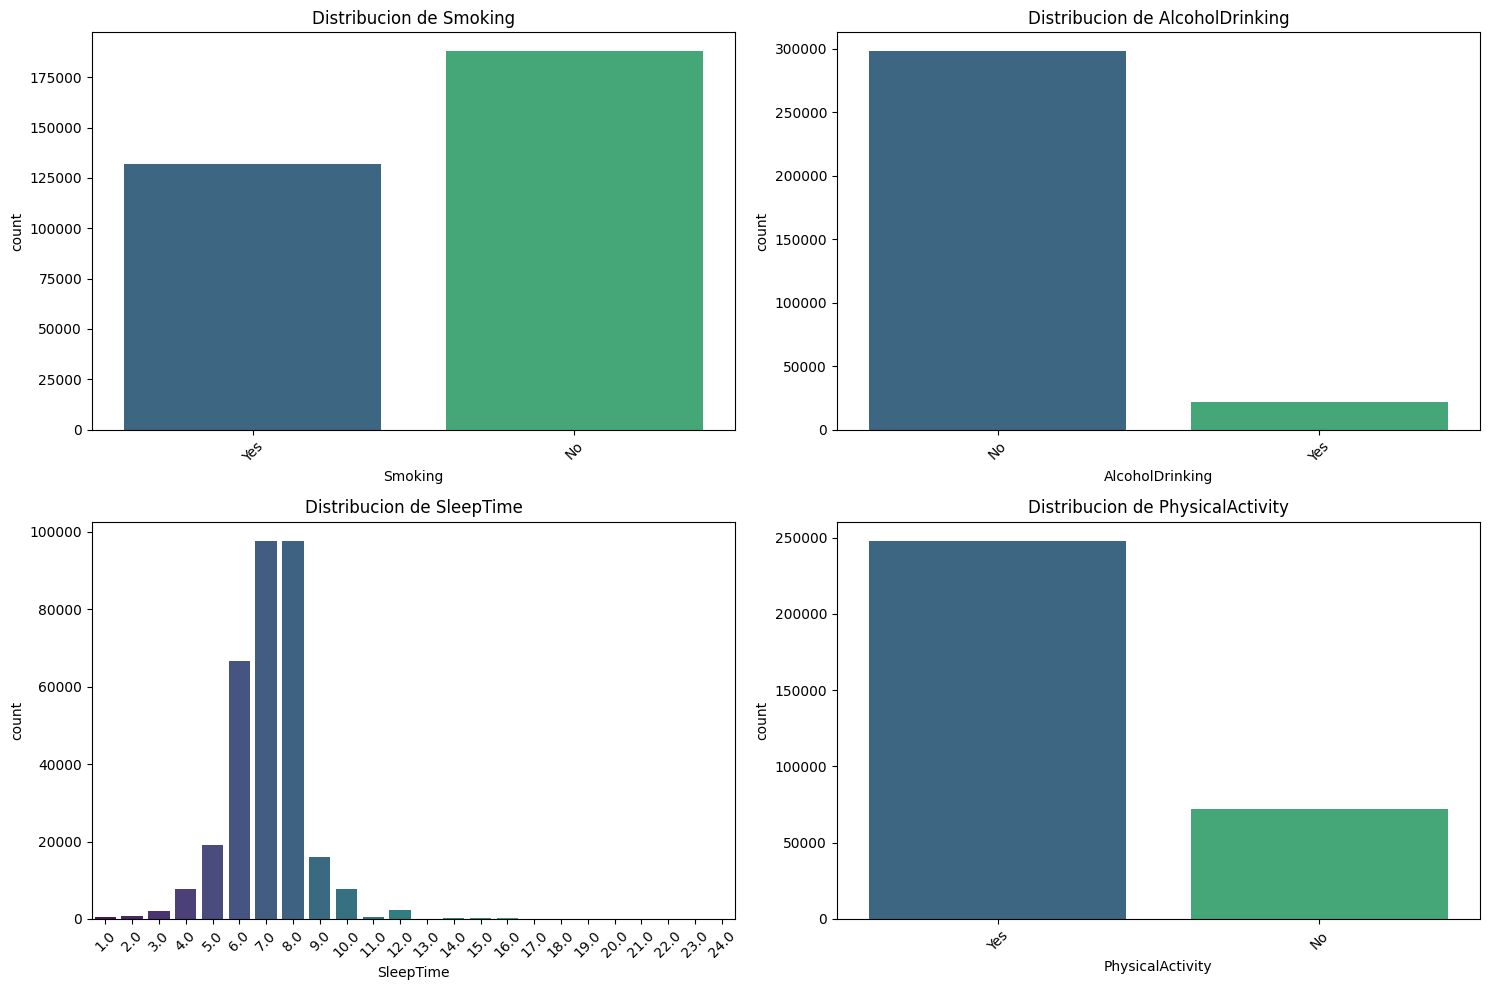

In [7]:
def univariado_cats(df_heart, lista_columnas):
    """
    Cuadricula de graficas categoricas
    """
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(lista_columnas, 1):
        plt.subplot(2, 2, i)
        sns.countplot(data=df_heart, x=col, palette='viridis')
        plt.title(f'Distribucion de {col}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


lifestyle_variables = ['Smoking', 'AlcoholDrinking', 'SleepTime', 'PhysicalActivity']
univariado_cats(df_heart, lifestyle_variables)

In [8]:
print("Porcentaje de incidencia real:")
print(df_heart['HeartDisease'].value_counts(normalize=True) * 100)

Porcentaje de incidencia real:
HeartDisease
No     91.440454
Yes     8.559546
Name: proportion, dtype: float64


Analisis Bivariado (variables numericas):

- Variable objetivo(Enfermedades cardiacas) comparado con las siguientes
Variables numericas:
- BMI
- SleepTime

In [9]:
def plot_bivariado_num(df_heart, col_num):
    '''
    Compara la variable objetivo HeartDisease con variable numerica
    '''
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df_heart, x='HeartDisease', y=col_num, palette='Set2')
    plt.title(f'Relación entre {col_num} y Enfermedades cardiacas')
    plt.show()

def plot_bivariado_cat(df_heart, col_cat):
    '''
    Compara la proporción de enfermedad con otra variable
    '''
    
    tabla_cruzada = pd.crosstab(df_heart[col_cat], df_heart['HeartDisease'], normalize='index')
    tabla_cruzada.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66c2a5', '#fc8d62'])
    plt.title(f'Incidencia de Enfermedad según {col_cat}')
    plt.xlabel(col_cat)
    plt.ylabel('Proporción de Población')
    plt.legend(title='HeartDisease', loc='upper right')
    plt.show()


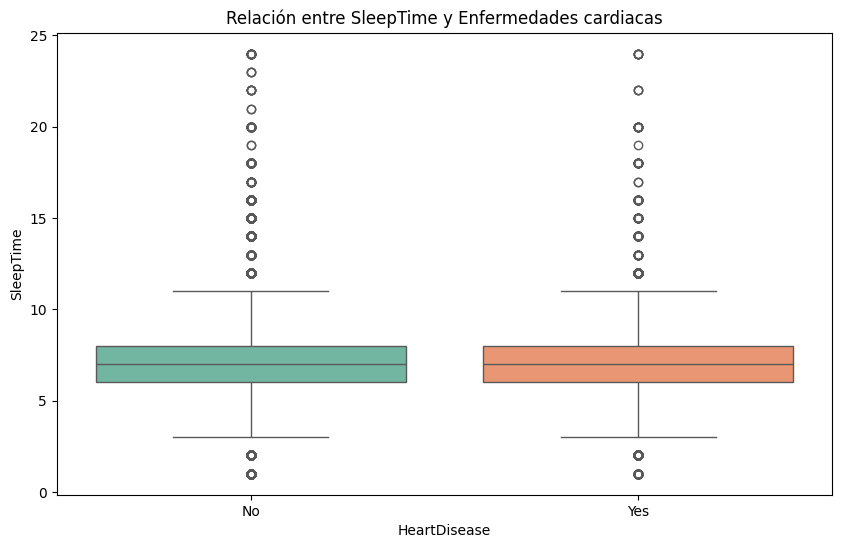

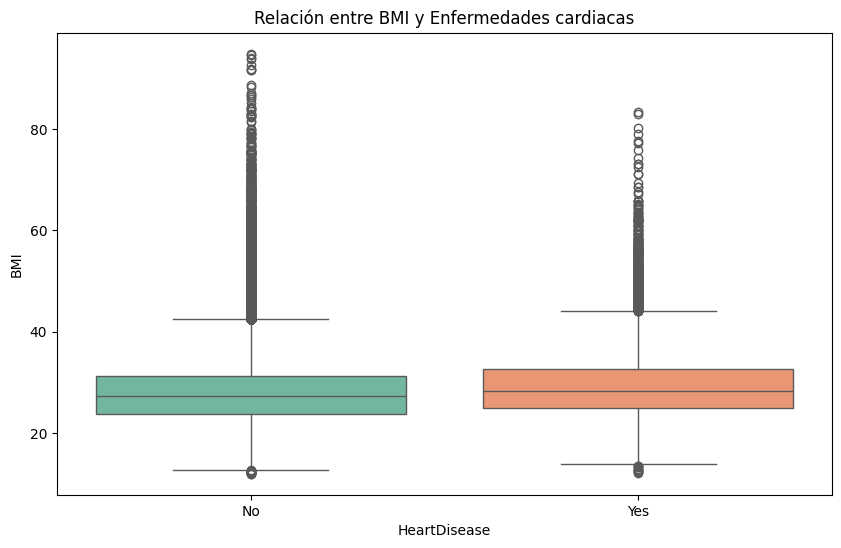

In [10]:
#graficas de comparacion bivariada con variable objetivo con variables numericas
plot_bivariado_num(df_heart, 'SleepTime')
plot_bivariado_num(df_heart, 'BMI')

Analisis Bivariado (variables categoricas):

- Variable objetivo(Enfermedades cardiacas) comparado con las siguientes
Variables categoricas:
- Smoking
- Sex
- AgeCategory
- Stroke

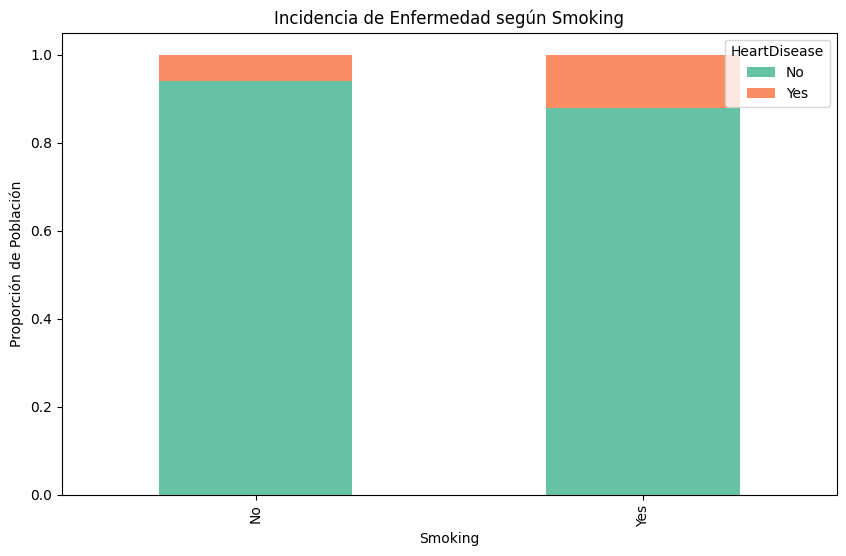

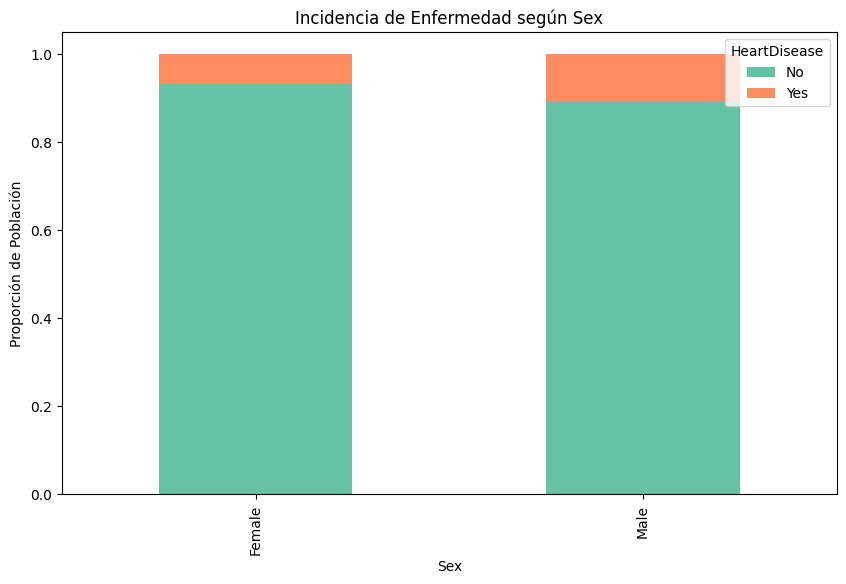

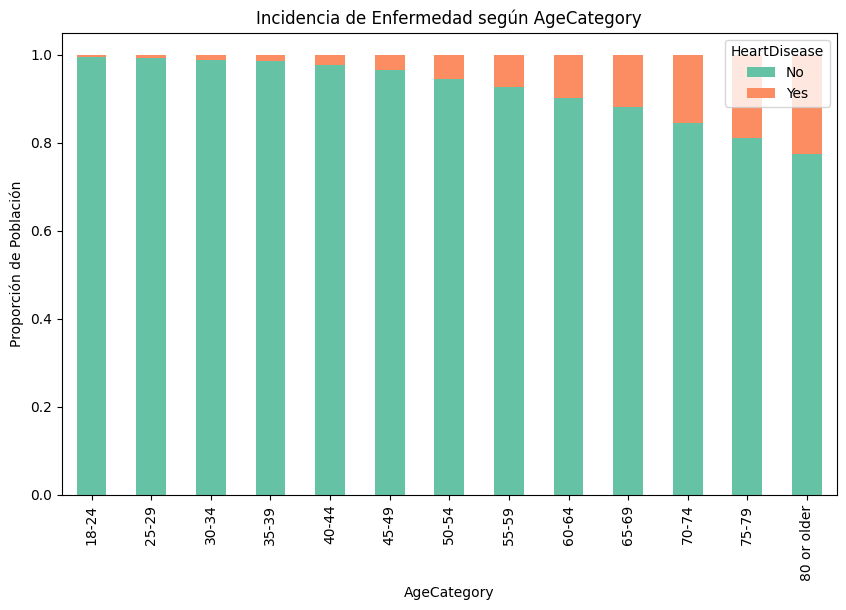

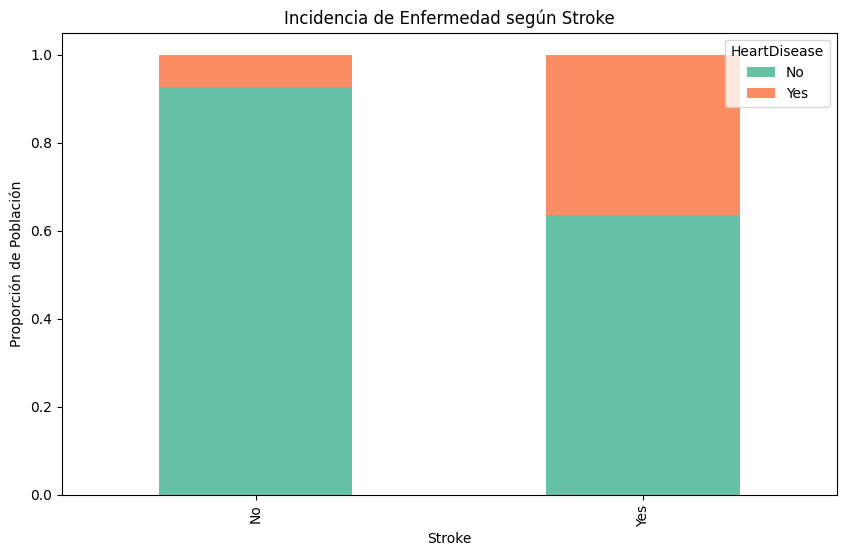

In [11]:
#graficas de comparacion bivariada con variable objetivo con variables categoricas
plot_bivariado_cat(df_heart, 'Smoking')
plot_bivariado_cat(df_heart, 'Sex')
plot_bivariado_cat(df_heart, 'AgeCategory')
plot_bivariado_cat(df_heart, 'Stroke')

Analisis Multivariado:
- Variable objetivo: Enfermedades cardíacas.
- HeartDisease
-Smoking
- Stroke
- DiffWalking
- PhysicalActivity
- Asthma
- KidneyDisease

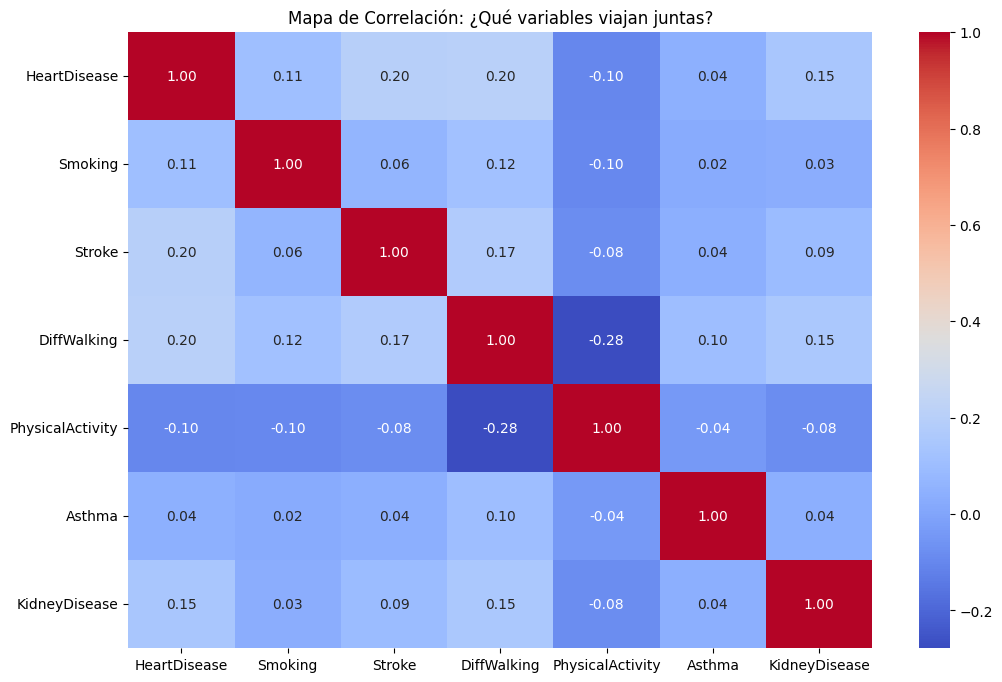

In [12]:
#Analisis multivariado
def plot_multivariado_heatmap(df):
    """
    Muestra correlación entre las variables de mayor importancia.
    """
    # convertimos a números las variables
    # para el analisis de correlacion
    cols_int = ['HeartDisease', 'Smoking', 'Stroke', 'DiffWalking', 
                    'PhysicalActivity', 'Asthma', 'KidneyDisease']
    
    # Convertimos Yes/No a 1/0
    df_num = df[cols_int].replace({'Yes': 1, 'No': 0})
    
    # Calculo de correlacion
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Mapa de Correlación: ¿Qué variables viajan juntas?')
    plt.show()

# Llamada
plot_multivariado_heatmap(df_heart)